<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# Histogramme

Bitte schau dir das Video für vollständige Einzelheiten an, aber beachte auch diese hervorragende Zusammenfassung: http://www.cambridgeincolour.com/tutorials/histograms1.htm

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Bildhistogramme mit OpenCV

Berücksichtige, dass Matplotlib Bilder in RGB-Reihenfolge im Gegensatz zu der BGR-Reihenfolge von OpenCV erwartet. Wenn OpenCV also etwas Kanal-orientiertes berechnen soll, müssen wir die originale RGB-Reihenfolge behalten. Wenn wir das Bild hingegen anzeigen wollen, muss es in die RGB-Reihenfolge konvertiert werden, die Matplotlib erwartet.

----

In [2]:
dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

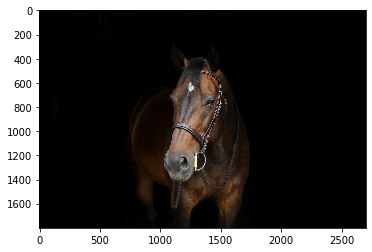

In [3]:
plt.imshow(show_horse)

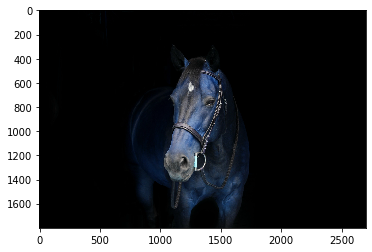

In [4]:
# BERÜCKSICHTIGE, DASS MATPLOTLIB RGB IN EINER ANDEREN REIHENFOLGE ERWARTET!
# BITTE SCHAU DAS VIDEO FÜR VOLLSTÄNDIGE INFORMATIONEN!
plt.imshow(dark_horse)

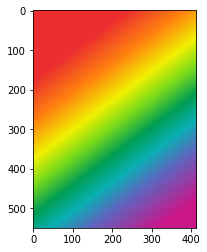

In [5]:
plt.imshow(show_rainbow)

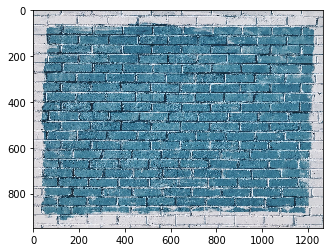

In [6]:
plt.imshow(show_bricks)

### OpenCV Histogramme

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : die Quelle des Bildes des Typs uint8 oder float32. Es sollte in eckigen Klammern angegeben werden, z.B. “[img]”.
* channels : wird ebenfalls in eckigen Klammern angegeben. Es ist der Index des Kanals, für den ein Histogramm berechnet werden soll. Beispielsweise, wenn das Eingabebild in Graustufen vorliegt ist der Wert [0]. Für Farbbilder wird [0], [1] oder [2] übergeben um dementsprechend das Histogramm des roten, grünen oder blauen Kanals zu berechnen.
* mask : Bildmaske. Um das Histogramm des gesamten Bildes zu finden, wird der Wert "None" übergeben. Wenn aber nur das Histogramm einer bestimmten Region des Bildes gefunden werden soll, musst du eine Bildmaske erzeugen und es als Maske übergeben. (Ich zeige später ein Beispiel dafür.)
* histSize : dies repräsentiert die Anzahl der Behälter (BINs). Muss in eckigen Klammern übergeben werden. Für die volle Skala üebergeben wir [256].
* ranges : dies ist unsere Reichweite (RANGE). Normalerweise ist es [0,256].

In [7]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [8]:
hist_values.shape

(256, 1)

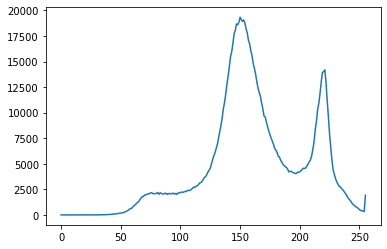

In [9]:
plt.plot(hist_values)

In [10]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

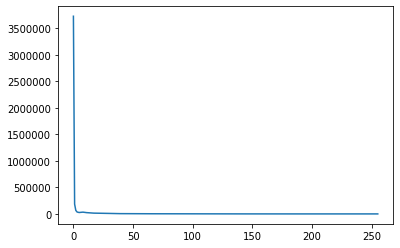

In [11]:
plt.plot(hist_values)

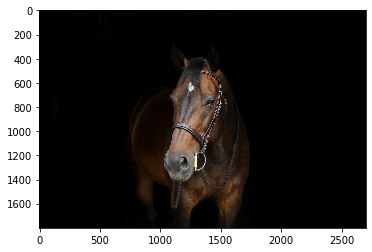

In [12]:
plt.imshow(show_horse)

## Plotten von 3-Farb-Histogrammen

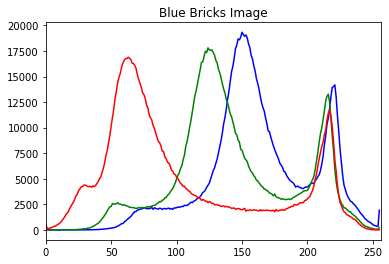

In [13]:
img = blue_bricks
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

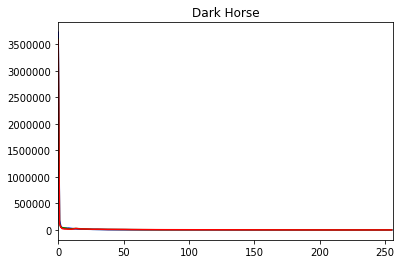

In [14]:
img = dark_horse
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Dark Horse')
plt.show()

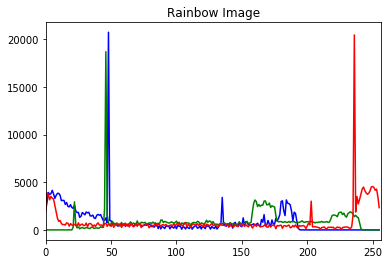

In [15]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

### Maskierung

Wir können bestimmte Teile des Bildes maskieren.

In [16]:
img = rainbow

In [17]:
img.shape

(550, 413, 3)

In [18]:
# erzeuge eine Maske
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

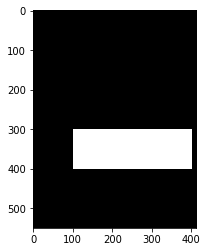

In [19]:
plt.imshow(mask,cmap='gray')

In [20]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

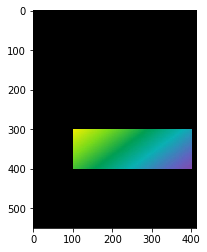

In [21]:
plt.imshow(show_masked_img)

In [22]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

Text(0.5, 1.0, 'Histogram for RED values of the full image')

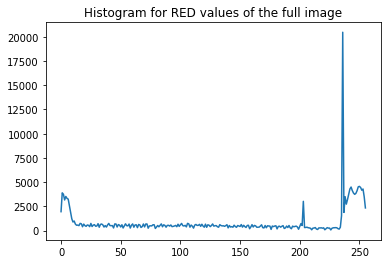

In [23]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5, 1.0, 'Histogram for RED values for the Masked Area')

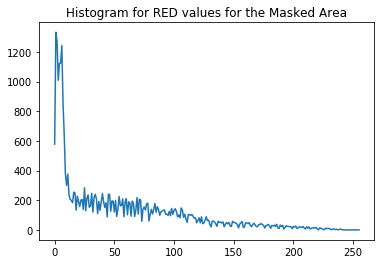

In [24]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')

# Histogramm-Angleichung (Equalization)

Bitte stelle sicher, dass du das Video gesehen hast und lies Folgendes: https://en.wikipedia.org/wiki/Histogram_equalization

In [25]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)

In [26]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

## Einkanal (Graustufe)

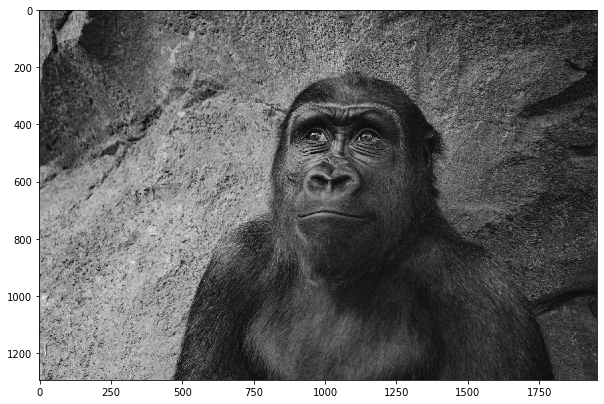

In [27]:
display(gorilla,cmap='gray')

In [28]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

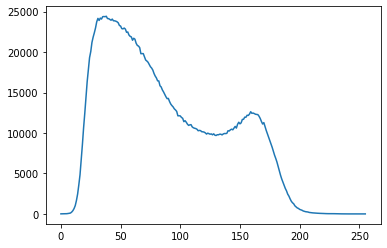

In [29]:
plt.plot(hist_values)

In [30]:
eq_gorilla = cv2.equalizeHist(gorilla)

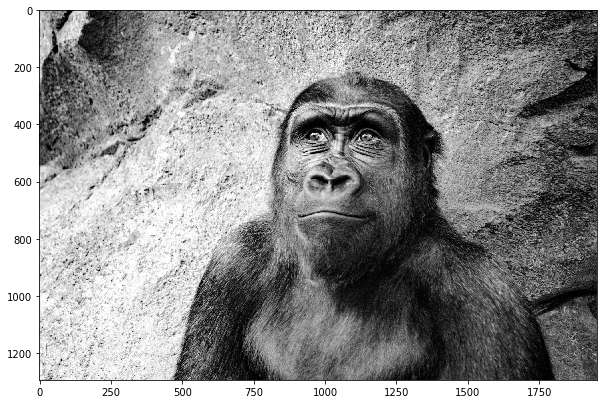

In [31]:
display(eq_gorilla,cmap='gray')

In [32]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

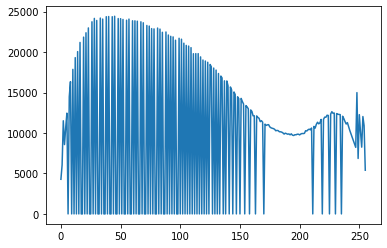

In [33]:
plt.plot(hist_values)

## Farbbilder

In [34]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Konvertiere in den HSV-Farbraum
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

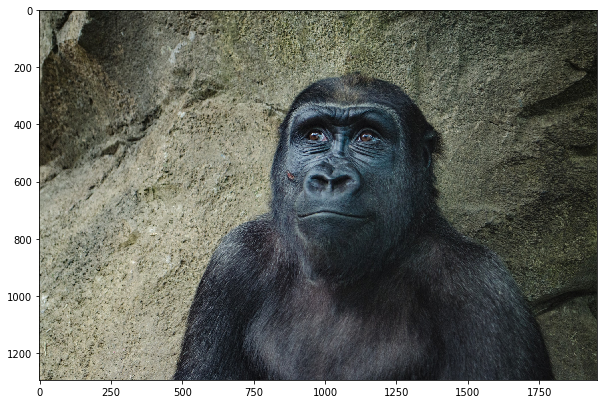

In [35]:
display(show_gorilla)

In [36]:
# Nimm den V-Kanal
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [37]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

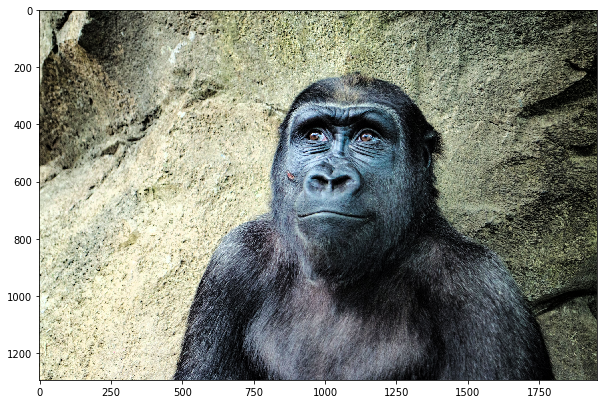

In [38]:
# Konvertiere zurück zu RGB und zeige das Bild an
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)